In [2]:
import torch
import requests
from PIL import Image
from io import BytesIO
import tqdm as notebook_tqdm

from diffusers import StableDiffusionImg2ImgPipeline

# load the pipeline
device = "mps"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained("runwayml/stable-diffusion-v1-5").to(
    device
)



Fetching 15 files: 100%|██████████| 15/15 [00:00<00:00, 139191.50it/s]
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


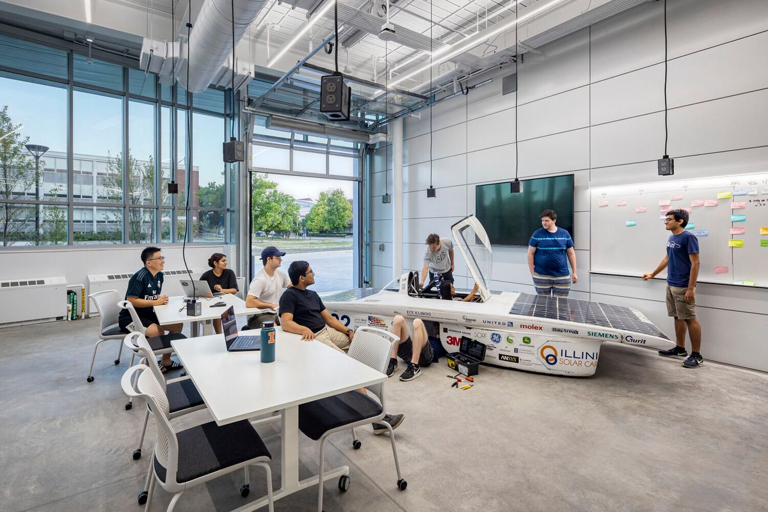

In [8]:
# let's download an initial image
url = "https://imgs.search.brave.com/vLSDF6rRTGecseo6t5vq3h0JuKvU0Nn2VnWW4IIk7dU/rs:fit:1200:1000:1/g:ce/aHR0cHM6Ly9ib2Jj/bGFya2JleW9uZC5j/b20vd3AtY29udGVu/dC91cGxvYWRzLzIw/MjEvMDgvQ2xheWNv/LXBvc3QtMi5qcGVn"

response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image.thumbnail((768, 768))
init_image

In [10]:
prompt = "futuristic energy efficient collaborative workshop, trending on artstation"
images = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5, num_inference_steps=37).images

100%|██████████| 27/27 [02:48<00:00,  6.24s/it]


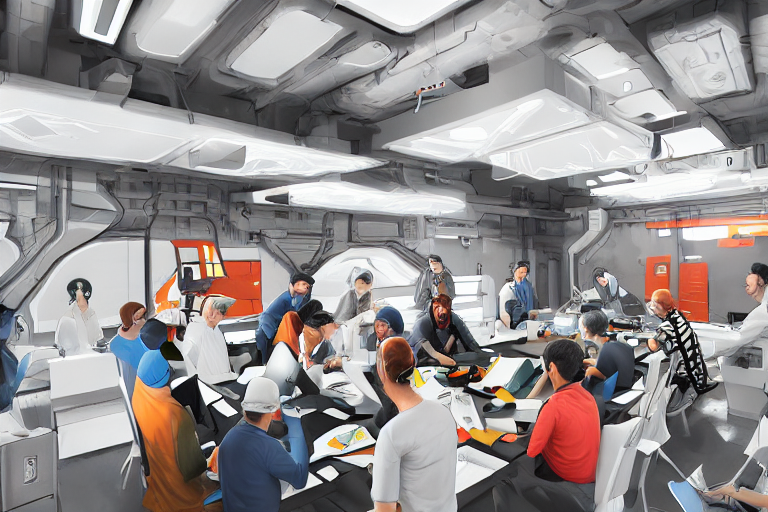

In [11]:
images[0]

iamge